d:\software_setup\anacoda\envs\pytorch\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    20.19      4.79511e+19       24          2.78301          2.96965     13.10s
   1    15.93      5.59561e+15       24          2.74217          2.66264     12.02s
   2    16.49           401185       35          2.05967          2.10943     12.15s
   3    18.48      2.85827e+12       48           1.9101          2.08977     11.24s
   4    22.03      8.51105e+12       38          1.86388          2.51711     11.90s
   5    25.63      3.50541e+06       47          1.90049          2.43603     12.00s
   6    32.17      4.41297e+27       37          1.87675          2.62705     11.80s
   7    33.94      5.38606e+12       37          1.83915          2.98879     11.53s
   8    33.45      7.45608e+11       39          1.82773          3.31245  

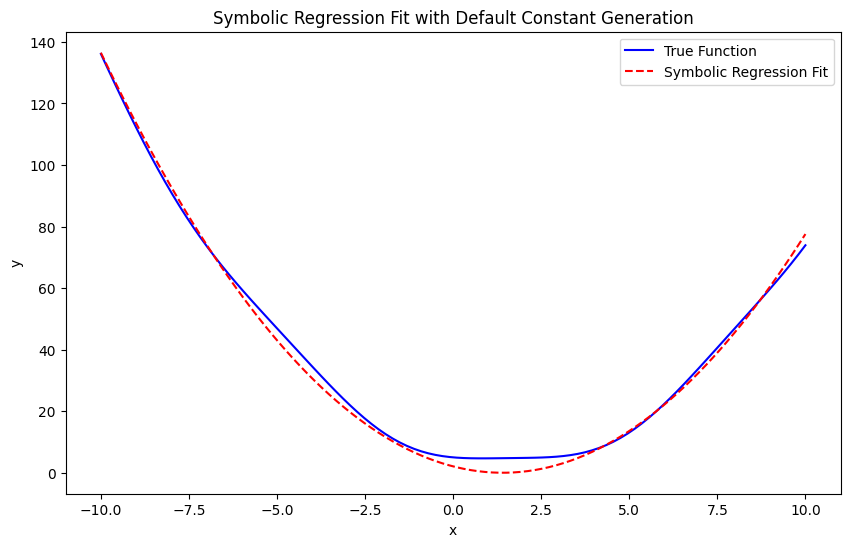

In [3]:
from gplearn.genetic import SymbolicRegressor
import numpy as np
from gplearn.functions import make_function
import matplotlib.pyplot as plt

# 生成数据
x = np.linspace(-10, 10, 100).reshape(-1, 1)
y = 2 * np.sin(x) + x**2 - 3 * x + 5  # 加入常数项 5

def power_two(x):
    return np.power(x, 2)

# 定义自定义函数
power_two_function = make_function(function=power_two, name="power2", arity=1)

# 限制符号函数的范围，包括自定义的幂次函数
function_set = ['add', 'sub', 'mul', 'sin', power_two_function]

# 定义符号回归模型
est_gp = SymbolicRegressor(
    population_size=1000,
    generations=40,
    stopping_criteria=0.01,
    function_set=function_set,
    p_crossover=0.7,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.05,
    p_point_mutation=0.1,
    max_samples=0.9,
    verbose=1,
    parsimony_coefficient=0.01,
    random_state=0
)

# 拟合模型
est_gp.fit(x, y)

# 预测和绘图
y_pred = est_gp.predict(x)
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="True Function", color="blue")
plt.plot(x, y_pred, label="Symbolic Regression Fit", color="red", linestyle="--")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Symbolic Regression Fit with Default Constant Generation")
plt.show()


In [4]:
print("Generated expression:", est_gp._program)

Generated expression: power2(sub(add(add(X0, 0.252), sub(-0.734, 0.946)), mul(sub(0.431, X0), power2(0.156))))


$$
(((x0+0.252)+(-0.724-0.946))-(0.156^2-x0)\times0.156^2)^2
$$